# Analyse Bevolkingsdata Utrecht

## Importeren van de data
Eerst wordt de data geïmporteerd, dit wordt gedaan met de code in het gegeven voorbeeld:

In [3]:
import csv
import numpy as np
import matplotlib.pyplot as plt

filename = 'utrecht.csv'

columns = {}
rows = []
data = {}

# hulp functie om te kijken of de waarde een integer is
def is_number(s):
    try:
        int(s)
        return True
    except ValueError:
        return False

with open(filename) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=';')
    line_count = 0
    for row in csv_reader:
        # anders reageren als het de eerste regel is, dat zijn namelijk de kolomnamen
        if line_count == 0:
            line_count += 1
            i = 0
            for c in row:
                columns[c] = i
                data[i] = []
                i += 1
        else:
            line_count += 1
            # alleen importeren als het maanddata is, niet de cummulatieven over een jaar
            if 'JJ00' in row[columns['Perioden']]:
                pass
            else:
                rows.append(row)
                i = 0
                for c in row:
                    if is_number(c):
                        data[i].append(int(c))
                    else:
                        data[i].append(c)
                    i = i+1
    print(f'Processed {line_count} lines.')

Processed 224 lines.


## Gemiddelde, Mediaan, Modus en Standaarddeviatie
Voor het berekenen van deze waarden is voor elk onderdeel een functie geschreven, die de waarde kan bepalen aan de hand van een gegeven lijst met getallen.
### Mediaan
De mediaan wordt bepaald aan de hand van de lengte van de lijst 'n'. Deze waarde wordt door verschillende if-statements gehaald om te controleren welke berekening moet worden uitgevoerd.<br>
Bij een lijst groter dan 2 wordt er gekeken of de lengte een oneven of even getal is. Bij een oneven getal wordt berekend hoevaak 2 in de lengte van de lijst past (met behulp van de '//' operator). Door ddit getal als index te gebruiken wordt de mediaan van de lijst teruggegeven.<br>
Bij een even getal wordt dezelfde techniek met de '//' operator toegepast om de middelste 2 getallen uit de lijst te halen en daar het gemiddelde van te berekenen.<br>
Als de lengte van de lijst gelijk is aan 2 wordt het gemiddelde van die 2 getallen teruggegeven.<br>
Bij een lengte van 1 wordt dat getal teruggegeven.

In [4]:
def median(lst):
    n = len(lst)
    if n > 2:
        if n % 2 == 0:
            return (lst[n // 2] + lst[(n // 2) - 1]) / 2.0
        else:
            return lst[n // 2]
    if n == 2:
        return (lst[0] + lst[1]) / 2
    return lst[0]

### Gemiddelde
Het gemiddelde wordt berekend door de som van de lijst te delen door de lengte van de lijst. Som en aantal worden op nul gezet, er wordt door de lijst gelopen om deze getallen juist te berekenen. De teruggegeven waarde is de som gedeeld door het aantal afgerond op 2 decimalen

In [5]:
def avg(lst):
    som = 0
    aantal = 0
    for num in lst:
        som += num
        aantal += 1
    return round(som / aantal, 2)

### Modus
Voor de modus wordt een set gemaakt van de lijst (unieke waarden in de lijst) Vervolgens wordt door de set gelopen en voor elke waarde gekeken hoeveel keer deze waarde in de lijst voorkomt. De waarden van de set worden opgeslagen in een dictionary, met als value het aantal keer voorkomen in de lijst. Vervolgens kan door alle values worden gelopen en elke keer dat de value groter is dan de max-variabele (start op 0) wordt de max-variabele de value, waardoor aan het einde van de loop de max waarde het grootste aantal bevat. De key die bij die value hoort wordt vervolgens teruggegeven.

In [6]:
def mode(lst):
    uniek = set(lst)
    output = {}
    for num in uniek:
        aantal = 0
        for i in lst:
            if i == num:
                aantal += 1
        output[num] = aantal

    max = 0
    k = 0
    for key, value in output.items():
        if value > max:
            max = value
            k = key
    return k

### Standaarddeviatie
De standaarddeviatie kan worden berekend met het verschil tussen elke waarde en het gemiddelde en de lengte van de lijst. De structuur van de functie lijkt op de functie van het gemiddelde, hierbij wordt de som gemaakt door het verschil van elke waarde met het gemiddelde van de lijst. Het totaal van deze waarden wordt gedeeld door de lengte van de lijst, de teruggegeven waarde is de wortel van de laatste waarde (hetzelfde als x tot de macht 1/2)

In [7]:
def standarddeviation(lst):
    som = 0
    aantal = 0
    average = avg(lst)
    for num in lst:
        som += ((num - average) ** 2)
        aantal += 1
    x = som / aantal
    sqrt = x ** (float(1)/2)
    return round(sqrt, 2)

### Data printen
Als laatste kan er nog een functie worden opgesteld die alle data uitrekent en print, zodat alle data netjes onder elkaar komen.

In [8]:
def printstatistics(data):
    data.sort()
    print("Gemiddelde:         ", avg(data))
    print("Mediaan:            ", median(data))
    print("Modus:              ", mode(data))
    print("Standaarddeviatie:  ", standarddeviation(data))

Hiermee kan data van verschillende kolommen worden geprint, bijvoorbeeld de data van 'vertrek naar andere gemeente, en data van 'levend geboren kinderen':

In [9]:
print("Vertrek naar andere gemeente:")
printstatistics(data[columns['VertrekNaarAndereGemeente_8']])
print("\nLevend geboren kinderen:")
printstatistics(data[columns['LevendGeborenKinderen_2']])

Vertrek naar andere gemeente:
Gemiddelde:          1465.65
Mediaan:             1389.5
Modus:               1239
Standaarddeviatie:   294.23

Levend geboren kinderen:
Gemiddelde:          396.03
Mediaan:             398.5
Modus:               392
Standaarddeviatie:   38.55


## Data weergeven in een plot
De data uit 'utrecht.csv' kan ook worden weergegeven in een plot. Hier wordt de data van 'levend geboren kinderen' van de laatste 12 perioden weergegeven in een plot:

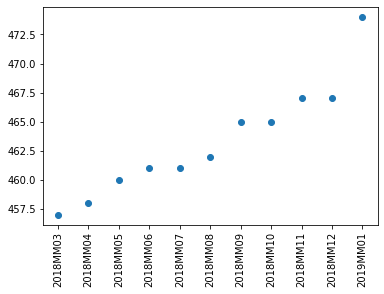

In [10]:
x = data[columns["Perioden"]][-12:-1]
y = data[columns["LevendGeborenKinderen_2"]][-12:-1]
plt.plot(x, y, 'o')
plt.xticks(rotation=90)
plt.show()

Om een lijn te tekenen kunnen de volgende formules worden gebruikt:<br>
$y=a+bx$<br><br>Waarbij:<br><br>
$b = \Large{\frac{\sum x_i  y_i - n \bar x\bar y )} {\sum (x_i - \bar x)^2}}$<br><br>
$a = \bar y - b \bar x$<br><br>
a en b kunnen dan volgens bovenstaande formules worden berekend in python (in 1 functie):

In [11]:
def linear_fit(X, Y):
    x = avg(X)
    y = avg(Y)
    n = len(X)
    num = sum(i * j for i, j in zip(X, Y)) - n * x * y
    denum = sum(i**2 for i in X) - n * x**2
    b = num / denum
    a = y - b * x
    return a, b

Vervolgens kan deze functie worden gebruikt om a en b te bepalen waarbij Y de lijst met geselecteerde data is en X een optellende getallenreeks vanaf 0 (De x-as met perioden is een string, waarmee niet te rekenen valt bij het maken van een lineaire lijn):

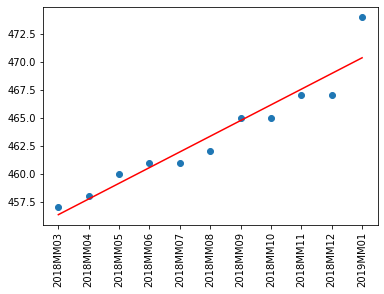

In [12]:
xfit = list(range(len(x))) #lijst met getallen ipv strings
a, b = linear_fit(xfit, y)
yfit = [a + b * i for i in xfit]
plt.scatter(x, y) #plotten van de dots
plt.plot(x, yfit, '-r') #plotten van de lijn
plt.xticks(rotation=90)
plt.show()